In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def make_Dictionary(root_dir):
    all_words = []
    emails = [os.path.join(root_dir, f) for f in os.listdir(root_dir)]
    for mail in emails:
        with open(mail) as m:
            for line in m:
                words = line.split()
                all_words += words
    dictionary = Counter(all_words)
    list_to_remove = list(dictionary.keys())
    for item in list_to_remove:
        if not item.isalpha() or len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(3000)
    return dictionary

def extract_features(mail_dir):
    files = [os.path.join(mail_dir, fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files), 3000))
    train_labels = np.zeros(len(files))
    docID = 0
    for fil in files:
        with open(fil) as fi:
            for i, line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        for i, d in enumerate(dictionary):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID, wordID] = words.count(word)
        train_labels[docID] = 0
        filepathTokens = fil.split('/')
        lastToken = filepathTokens[-1]
        if lastToken.startswith("spmsg"):
            train_labels[docID] = 1
        docID += 1
    return features_matrix, train_labels

TRAIN_DIR = "/content/drive/MyDrive/Notas Propredeutico/Programación/train-mails"
TEST_DIR = "/content/drive/MyDrive/Notas Propredeutico/Programación/test-mails"

dictionary = make_Dictionary(TRAIN_DIR)
print("Reading and processing emails from file.")
features_matrix, labels = extract_features(TRAIN_DIR)
test_feature_matrix, test_labels = extract_features(TEST_DIR)

model = GaussianNB()
print("Training model.")
model.fit(features_matrix, labels)

predicted_labels = model.predict(test_feature_matrix)
accuracy = accuracy_score(test_labels, predicted_labels)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy))

Reading and processing emails from file.
Training model.
FINISHED classifying. Accuracy score: 96.30%


In [15]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
print("Training model.")
model2.fit(features_matrix, labels)

predicted_labels = model2.predict(test_feature_matrix)
accuracy2 = accuracy_score(test_labels, predicted_labels)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy2))

Training model.
FINISHED classifying. Accuracy score: 96.30%


In [16]:
from sklearn.naive_bayes import BernoulliNB
model3 = BernoulliNB()
print("Training model.")
model3.fit(features_matrix, labels)

predicted_labels = model3.predict(test_feature_matrix)
accuracy3 = accuracy_score(test_labels, predicted_labels)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy3))

Training model.
FINISHED classifying. Accuracy score: 77.41%


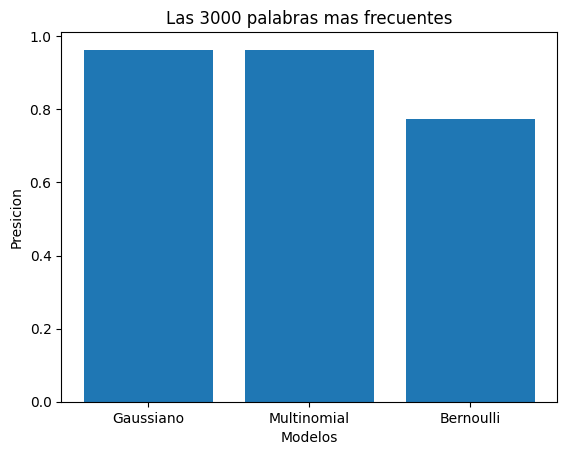

In [17]:
import matplotlib.pyplot as plt

x = ['Gaussiano', 'Multinomial', 'Bernoulli']
y = [accuracy, accuracy2, accuracy3]

plt.bar(x, y)
plt.xlabel('Modelos')
plt.ylabel('Presicion')
plt.title('Las 3000 palabras mas frecuentes')
plt.show()

In [18]:
def make_Dictionary(root_dir):
    all_words = []
    emails = [os.path.join(root_dir, f) for f in os.listdir(root_dir)]
    for mail in emails:
        with open(mail) as m:
            for line in m:
                words = line.split()
                all_words += words
    dictionary = Counter(all_words)
    list_to_remove = list(dictionary.keys())
    for item in list_to_remove:
        if not item.isalpha() or len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(1500)
    return dictionary

def extract_features(mail_dir):
    files = [os.path.join(mail_dir, fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files), 1500))
    train_labels = np.zeros(len(files))
    docID = 0
    for fil in files:
        with open(fil) as fi:
            for i, line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        for i, d in enumerate(dictionary):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID, wordID] = words.count(word)
        train_labels[docID] = 0
        filepathTokens = fil.split('/')
        lastToken = filepathTokens[-1]
        if lastToken.startswith("spmsg"):
            train_labels[docID] = 1
        docID += 1
    return features_matrix, train_labels

TRAIN_DIR = "/content/drive/MyDrive/Notas Propredeutico/Programación/train-mails"
TEST_DIR = "/content/drive/MyDrive/Notas Propredeutico/Programación/test-mails"

dictionary = make_Dictionary(TRAIN_DIR)
print("Reading and processing emails from file.")
features_matrix, labels = extract_features(TRAIN_DIR)
test_feature_matrix, test_labels = extract_features(TEST_DIR)

model = GaussianNB()
print("Training model.")
model.fit(features_matrix, labels)

predicted_labels = model.predict(test_feature_matrix)
accuracy = accuracy_score(test_labels, predicted_labels)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy))

model2 = MultinomialNB()
print("Training model.")
model2.fit(features_matrix, labels)

predicted_labels2 = model2.predict(test_feature_matrix)
accuracy2 = accuracy_score(test_labels, predicted_labels2)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy2))

model3 = BernoulliNB()
print("Training model.")
model3.fit(features_matrix, labels)

predicted_labels3 = model3.predict(test_feature_matrix)
accuracy3 = accuracy_score(test_labels, predicted_labels3)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy3))

Reading and processing emails from file.
Training model.
FINISHED classifying. Accuracy score: 96.30%
Training model.
FINISHED classifying. Accuracy score: 96.30%
Training model.
FINISHED classifying. Accuracy score: 77.04%


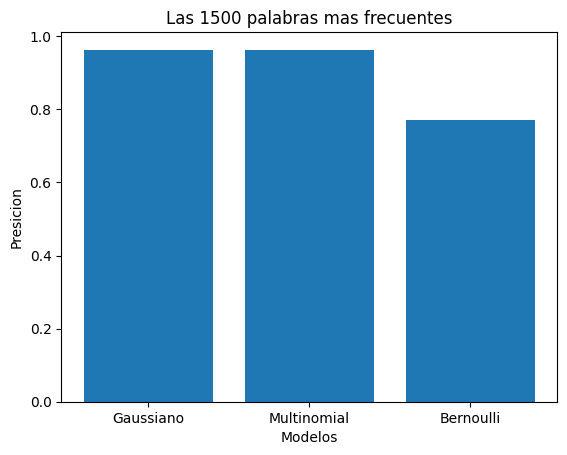

In [19]:
import matplotlib.pyplot as plt

x = ['Gaussiano', 'Multinomial', 'Bernoulli']
y = [accuracy, accuracy2, accuracy3]

plt.bar(x, y)
plt.xlabel('Modelos')
plt.ylabel('Presicion')
plt.title('Las 1500 palabras mas frecuentes')
plt.show()

In [20]:
def make_Dictionary(root_dir):
    all_words = []
    emails = [os.path.join(root_dir, f) for f in os.listdir(root_dir)]
    for mail in emails:
        with open(mail) as m:
            for line in m:
                words = line.split()
                all_words += words
    dictionary = Counter(all_words)
    list_to_remove = list(dictionary.keys())
    for item in list_to_remove:
        if not item.isalpha() or len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(6000)
    return dictionary

def extract_features(mail_dir):
    files = [os.path.join(mail_dir, fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files), 6000))
    train_labels = np.zeros(len(files))
    docID = 0
    for fil in files:
        with open(fil) as fi:
            for i, line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        for i, d in enumerate(dictionary):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID, wordID] = words.count(word)
        train_labels[docID] = 0
        filepathTokens = fil.split('/')
        lastToken = filepathTokens[-1]
        if lastToken.startswith("spmsg"):
            train_labels[docID] = 1
        docID += 1
    return features_matrix, train_labels

TRAIN_DIR = "/content/drive/MyDrive/Notas Propredeutico/Programación/train-mails"
TEST_DIR = "/content/drive/MyDrive/Notas Propredeutico/Programación/test-mails"

dictionary = make_Dictionary(TRAIN_DIR)
print("Reading and processing emails from file.")
features_matrix, labels = extract_features(TRAIN_DIR)
test_feature_matrix, test_labels = extract_features(TEST_DIR)

model = GaussianNB()
print("Training model.")
model.fit(features_matrix, labels)

predicted_labels = model.predict(test_feature_matrix)
accuracy = accuracy_score(test_labels, predicted_labels)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy))

model2 = MultinomialNB()
print("Training model.")
model2.fit(features_matrix, labels)

predicted_labels2 = model2.predict(test_feature_matrix)
accuracy2 = accuracy_score(test_labels, predicted_labels2)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy2))

model3 = BernoulliNB()
print("Training model.")
model3.fit(features_matrix, labels)

predicted_labels3 = model3.predict(test_feature_matrix)
accuracy3 = accuracy_score(test_labels, predicted_labels3)
print("FINISHED classifying. Accuracy score: {:.2%}".format(accuracy3))

Reading and processing emails from file.
Training model.
FINISHED classifying. Accuracy score: 96.30%
Training model.
FINISHED classifying. Accuracy score: 96.30%
Training model.
FINISHED classifying. Accuracy score: 82.22%


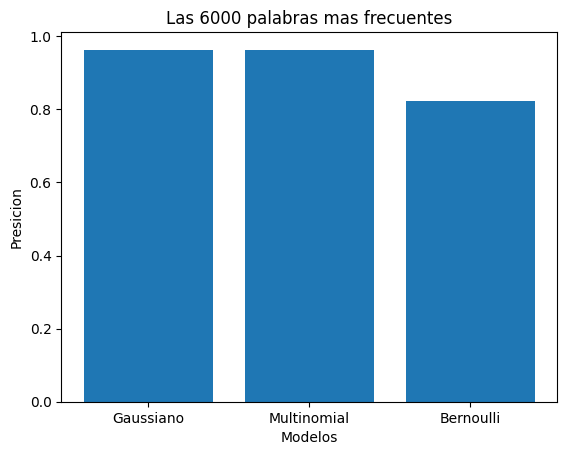

In [22]:
import matplotlib.pyplot as plt

x = ['Gaussiano', 'Multinomial', 'Bernoulli']
y = [accuracy, accuracy2, accuracy3]

plt.bar(x, y)
plt.xlabel('Modelos')
plt.ylabel('Presicion')
plt.title('Las 6000 palabras mas frecuentes')
plt.show()